In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install wordcloud

     |████████████████████████████████| 371 kB 979 kB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 14.1 MB/s eta 0:00:01     |████████████████████████████▎   | 10.0 MB 14.1 MB/s eta 0:00:01
     |████████████████████████████████| 930 kB 19.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 27.0 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [6]:
def file_get_contents(filename):
    with open(filename) as f:
        return f.read()

In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import json

file_json_contents = file_get_contents("./files_parseds/ALEXIS PEDRÃO_260001087378.json")
json_data = json.loads(file_json_contents)
content_pages = [content["text"] for content in json_data["content"]]

In [33]:
tfIdfVectorizer=TfidfVectorizer(use_idf=True, ngram_range=(1,2))
tfIdf = tfIdfVectorizer.fit_transform(content_pages)
df = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
df_word = df.head(50)
expressions_clear = [
    "de",
    "do",
    "da",
    "uma",
    "na",
    "nos",
    "nas",
    "que"
]

sentences_dictionary = {}

for sentence, row in df_word.iterrows():
    if sentence not in expressions_clear:
        sentences_dictionary[sentence] = row["TF-IDF"]

print(sentences_dictionary)

{'aracaju': 0.17121584987023516, 'durante pandemia': 0.15083734782930336, 'psol aracaju': 0.1439943986561553, 'pandemia': 0.1435605132884834, 'durante': 0.14168474687299265, 'psol': 0.11312801087197752, 'queremos': 0.0959962657707702, 'que estão': 0.0959962657707702, 'construção da': 0.0959962657707702, 'uma proposta': 0.0959962657707702, 'eleições': 0.0959962657707702, 'do psol': 0.08745579350562607, 'aracaju durante': 0.08745579350562607, 'estão': 0.08083128856201614, 'de aracaju': 0.07232486567238486, 'proposta': 0.07084237343649633, 'toda': 0.0633815543236773, 'programa': 0.0633815543236773, 'construção': 0.05484108205853318, 'etc que': 0.05401669268087229, 'pandemia de': 0.05401669268087229, 'maioria inicialmente': 0.05401669268087229, 'intervenção': 0.05401669268087229, 'de construção': 0.05401669268087229, 'acima': 0.05401669268087229, 'pandemia atuação': 0.05401669268087229, 'acima do': 0.05401669268087229, 'dificuldades': 0.05401669268087229, 'intervenção nas': 0.0540166926808

/home/nathanfeitoza/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


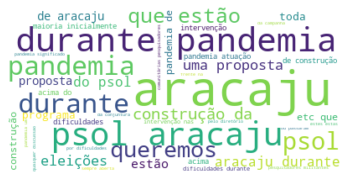

In [34]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

words_cloud = WordCloud(background_color="white", max_words=50).generate_from_frequencies(sentences_dictionary)

plt.imshow(words_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()